In [1]:
###Load required packages

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime
import warnings
import seaborn as sns

import scipy.stats as stats
import sklearn

import pickle

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [3]:
#EDA data filepath downloaded and stored here
filename = 'C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/data_frame_for_EDA.csv'

In [4]:
load=pd.read_csv(filename, header =0, index_col=['Loan_Sequence_Number','Monthly_Reporting_Period'])

In [5]:
df =load

In [6]:
df= df.sample(n=None, frac=.01, replace=False, weights=None, random_state=123, axis=None)

In [7]:
df = df.reset_index()

In [8]:
drop_features =['Loan_Sequence_Number', 'Monthly_Reporting_Period','Maturity_Date',
                'Prepayment_Penalty_Flag','Orig_Year','Remaining_Months_to_Legal_Maturity',
                'Current_Deferred_UPB', 'Actual_Loss_Calculation', 'Modification_Flag',
               'Ever_Default', 'prin_repay_pct','MI%','Loss_Severity','Zero_Balance_Code','Zero_Balance_Removal_UPB',
               'Original_UPB','First_Time_Homebuyer_Flag', 'Original_Loan_Term','Number_of_Units']

In [9]:
df.drop(labels=drop_features,axis=1, inplace=True)

In [10]:
def convert_DQ(x):
    if x == 'Current':
        return 0
    if x == '1m_DQ':
        return 1
    if x == '2m_DQ':
        return 2
    if x == '3m_DQ':
        return 3
    if x == '4m_DQ':
        return 4
    if x == '5m_DQ':
        return 5
    if x == '6m_DQ':
        return 6
    if x == '7m_to_12m_DQ':
        return 7
    if x == '13m_to_24m_DQ':
        return 8
    if x == '>24m_DQ':
        return 9
    if x == 'Default':
        return 10
    else:
        return 'missing'

In [11]:
df['Target_Performance_Variable']=df['Target_Performance_Variable'].apply(convert_DQ)

In [12]:
y = df['Target_Performance_Variable']
df.drop('Target_Performance_Variable', axis=1, inplace=True)

In [13]:
dummy_features = ['previous_period','Property_Type','Occupancy_Status','Channel',
                 'Loan_Purpose']

In [14]:
scaled_features = ['Current_Actual_UPB','Credit_Score', 'Current_Interest_Rate',
       'Original_DTI', 'Original_LTV','Number_of_Borrowers',
        'Y10_CMT','HPA_adjusted_LTV', 'Y30_fixed_mortgage_rate',
                   'CS_HP', 'UNEMPLOY', 'LF_Part','Original_CLTV','Loan_Age']

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Scale only with continuous variables or integers
to_scale = [feature for feature in scaled_features]
mms = MinMaxScaler()
scaled = mms.fit_transform(df[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

df.reset_index(inplace=True, drop=True)

# Replace original columns with scaled ones
for feature in scaled_features:
    df[feature] = scaled[feature]

In [16]:
df = pd.get_dummies(df,drop_first=True)

In [17]:
X=df

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=125)

In [19]:
for c in range(len(X_train.columns)):
    print(X_train.columns[c])
    try:
        print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[c] * 100, 2)}
        % Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[c] * 100, 2)}''')
        print ('_________')
    except:
        continue
print('END')

Current_Actual_UPB
% Positive class in Train = 96.86
        % Positive class in Test  = 96.91
_________
Credit_Score
% Positive class in Train = 1.41
        % Positive class in Test  = 1.4
_________
Original_CLTV
% Positive class in Train = 0.43
        % Positive class in Test  = 0.44
_________
Original_DTI
% Positive class in Train = 0.2
        % Positive class in Test  = 0.19
_________
Original_LTV
% Positive class in Train = 0.15
        % Positive class in Test  = 0.14
_________
Number_of_Borrowers
% Positive class in Train = 0.11
        % Positive class in Test  = 0.12
_________
Loan_Age
% Positive class in Train = 0.1
        % Positive class in Test  = 0.08
_________
Current_Interest_Rate
% Positive class in Train = 0.32
        % Positive class in Test  = 0.32
_________
CS_HP
% Positive class in Train = 0.23
        % Positive class in Test  = 0.23
_________
UNEMPLOY
% Positive class in Train = 0.16
        % Positive class in Test  = 0.15
_________
LF_Part
% Positive clas

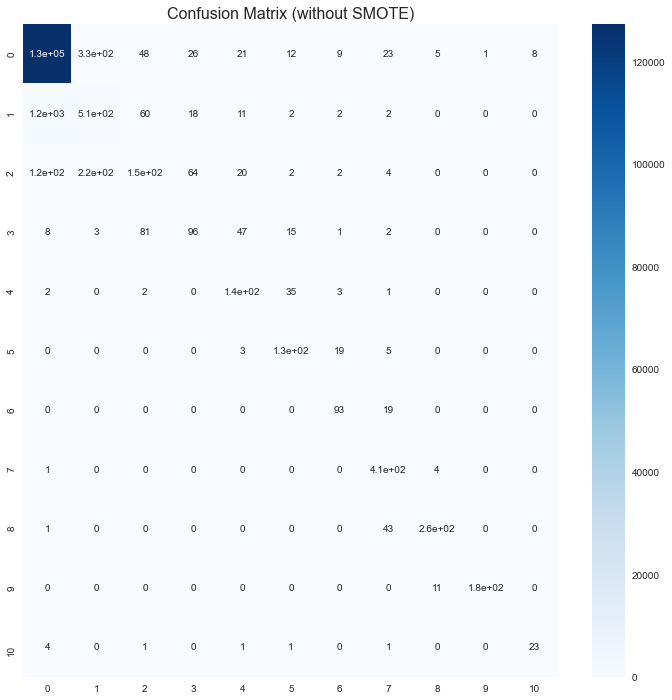

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Train
model = LogisticRegression(random_state=42, multi_class='multinomial', penalty='none', solver='newton-cg')
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 10})
plt.title('Confusion Matrix (without SMOTE)' , size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [21]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=123)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (527167, 34)
Shape of X after SMOTE: (5617381, 34)

Balance of positive and negative classes (%):


0     9.090909
1     9.090909
2     9.090909
3     9.090909
4     9.090909
5     9.090909
6     9.090909
7     9.090909
8     9.090909
9     9.090909
10    9.090909
Name: Target_Performance_Variable, dtype: float64

                                      coef
Current_Actual_UPB            4.594511e+19
previous_period_Current       8.328287e+06
Y10_CMT                       1.462514e+06
previous_period_1m_DQ         1.913304e+05
previous_period_2m_DQ         1.169542e+04
previous_period_>24m_DQ       2.628622e+03
previous_period_3m_DQ         1.966286e+03
Credit_Score                  4.069072e+02
Original_LTV                  3.270607e+02
previous_period_7m_to_12m_DQ  2.980217e+02
previous_period_4m_DQ         2.517778e+02
previous_period_5m_DQ         2.505897e+02
previous_period_6m_DQ         2.195502e+02
Property_Type_CP              8.448766e+00
Property_Type_MH              7.011456e+00
Occupancy_Status_S            5.596471e+00
Occupancy_Status_P            2.569185e+00
LF_Part                       2.450104e+00
Property_Type_PU              2.272297e+00
Property_Type_SF              2.183757e+00
Number_of_Borrowers           2.056274e+00
Channel_R                     1.575678e+00
Loan_Purpos

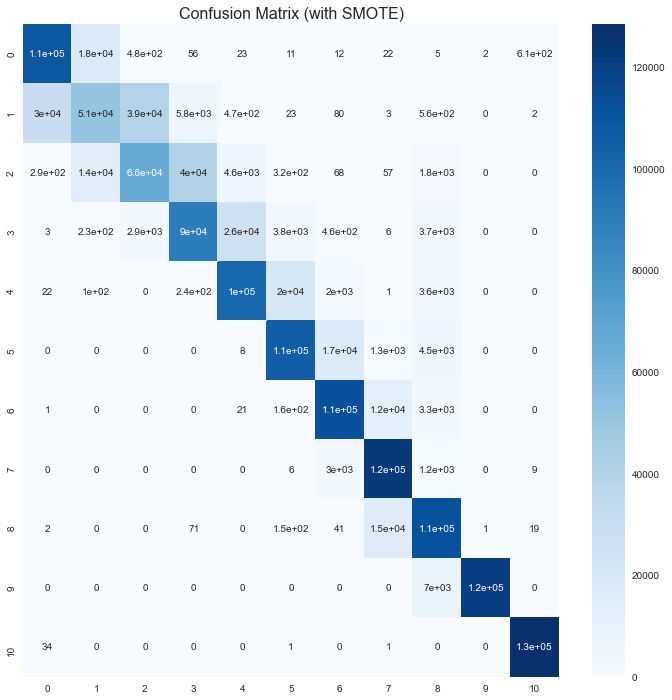

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.25, random_state=123)
# Train
model = LogisticRegression(random_state=42, multi_class='multinomial', penalty='none', solver='newton-cg')
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate   
odds = np.exp(model.coef_[0])
print(pd.DataFrame(odds, 
            X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False))
print ('_________')
    
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 12))
plt.rcParams.update({'font.size': 10})
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [23]:
filename = 'C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/final_LR_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [24]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [25]:
# Fit
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

In [26]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

In [27]:
n_class = 10

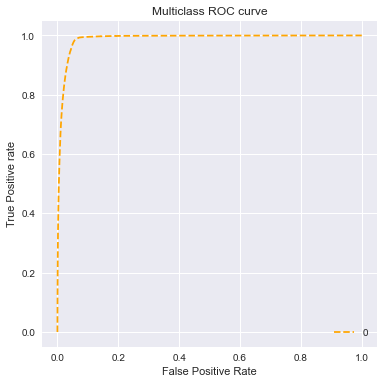

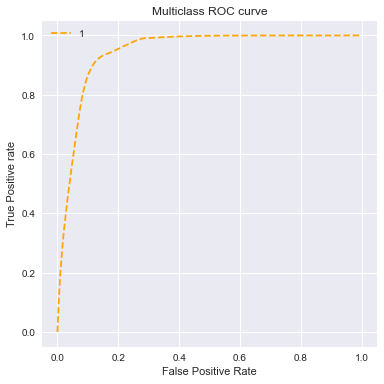

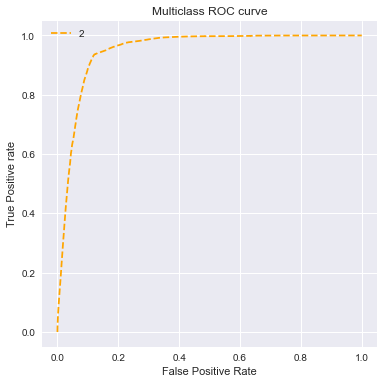

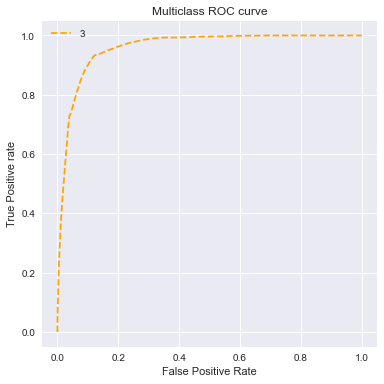

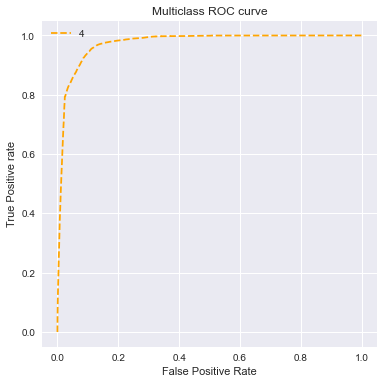

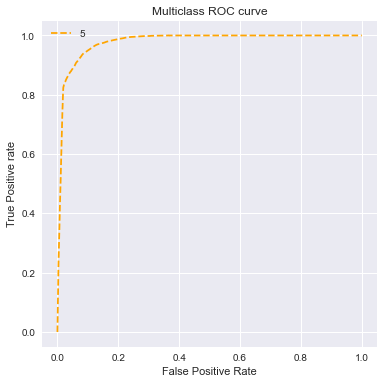

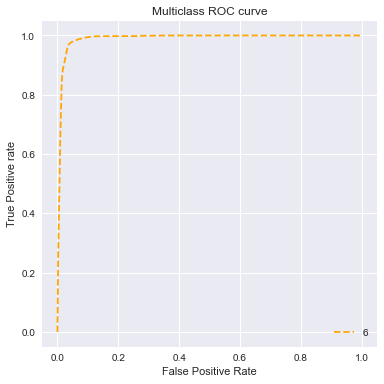

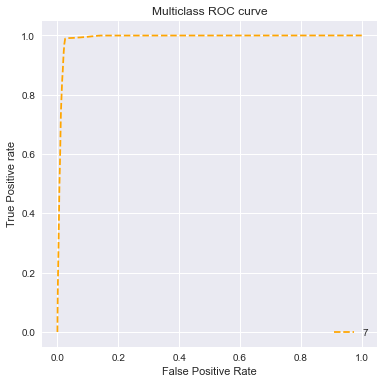

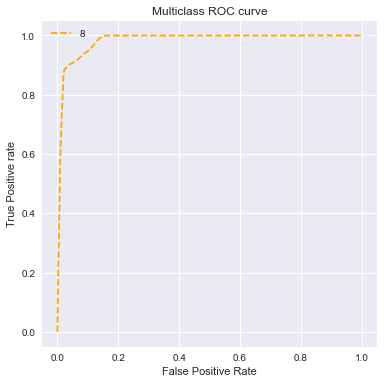

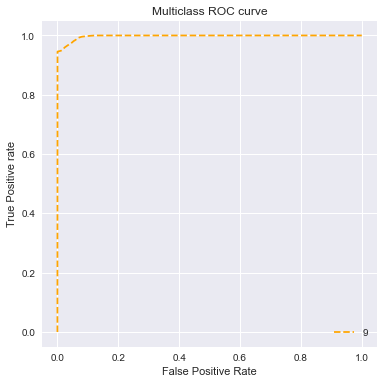

In [28]:
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
        # plotting 
    plt.figure(figsize=(6, 6))
    plt.plot(fpr[i], tpr[i], linestyle='--',color='orange', label=i)
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show 

In [29]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7976666718885517


In [34]:
w0 = model.intercept_[0]
w = w1, w2, w3, w4, w5, w6, w7, w8, w9, w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20, w21,w22,w23,w24,w25,w26,w27,w28,w29,w30,w31,w32,w33,w34 = model.coef_[0]

In [35]:
import math
def sigmoid(x):
    return 1 / (1 + pow(math.e, -x))


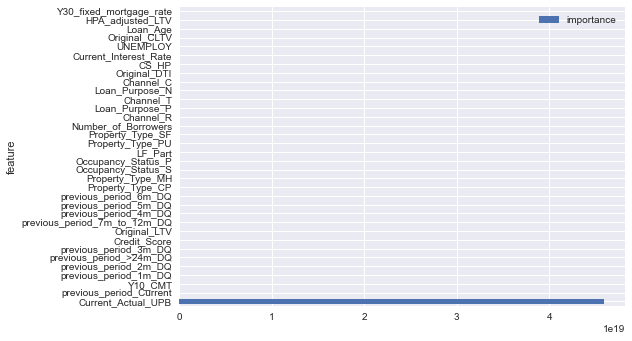

In [36]:
feature_importance=pd.DataFrame(df.columns.values,columns=['feature'])
feature_importance['importance']=pow(math.e,w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)

ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

In [37]:
feature_importance.round(1)


,feature,importance
0,Current_Actual_UPB,4.594511e+19
33,previous_period_Current,8.328287e+06
11,Y10_CMT,1.462514e+06
25,previous_period_1m_DQ,1.913304e+05
26,previous_period_2m_DQ,1.169540e+04
32,previous_period_>24m_DQ,2.628600e+03
27,previous_period_3m_DQ,1.966300e+03
1,Credit_Score,4.069000e+02
4,Original_LTV,3.271000e+02
31,previous_period_7m_to_12m_DQ,2.980000e+02


In [38]:
len(df.columns)

34

In [47]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [49]:
regression_results(y_test, preds)

explained_variance:  0.9521
mean_squared_log_error:  0.0409
r2:  0.9498
MAE:  0.2591
MSE:  0.5025
RMSE:  0.7089
